# Tutorial: Regularizing a Decision Tree (Hyperparameter Tuning)

Di subchapter sebelumnya, kita melihat dengan jelas bagaimana Decision Tree yang tidak dibatasi akan overfitting secara liar. Kita tahu masalahnya, sekarang saatnya mempelajari solusinya.

**Regularisasi** dalam konteks Decision Tree berarti **membatasi pertumbuhannya** agar tidak menjadi terlalu kompleks. Kita melakukan ini dengan menyesuaikan **hyperparameter** dari model. Hyperparameter adalah "pengaturan" yang kita berikan kepada model sebelum ia mulai belajar, yang mengontrol bagaimana proses pembelajaran itu sendiri berlangsung.

Di notebook ini, kita akan fokus pada hyperparameter paling penting untuk mengontrol kompleksitas Decision Tree.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan apa itu hyperparameter dalam konteks Decision Tree.
* Mengidentifikasi dan menjelaskan tiga hyperparameter regularisasi utama: `max_depth`, `min_samples_split`, dan `min_samples_leaf`.
* Mengimplementasikan regularisasi dengan mengatur hyperparameter ini di `DecisionTreeRegressor`.
* Memvisualisasikan bagaimana regularisasi menghasilkan model yang lebih sederhana dan lebih baik dalam menggeneralisasi.


---
### 2. Setup: Menggunakan Data yang Sama

Kita akan melanjutkan dengan data non-linear dan train-test split yang sama untuk konsistensi.


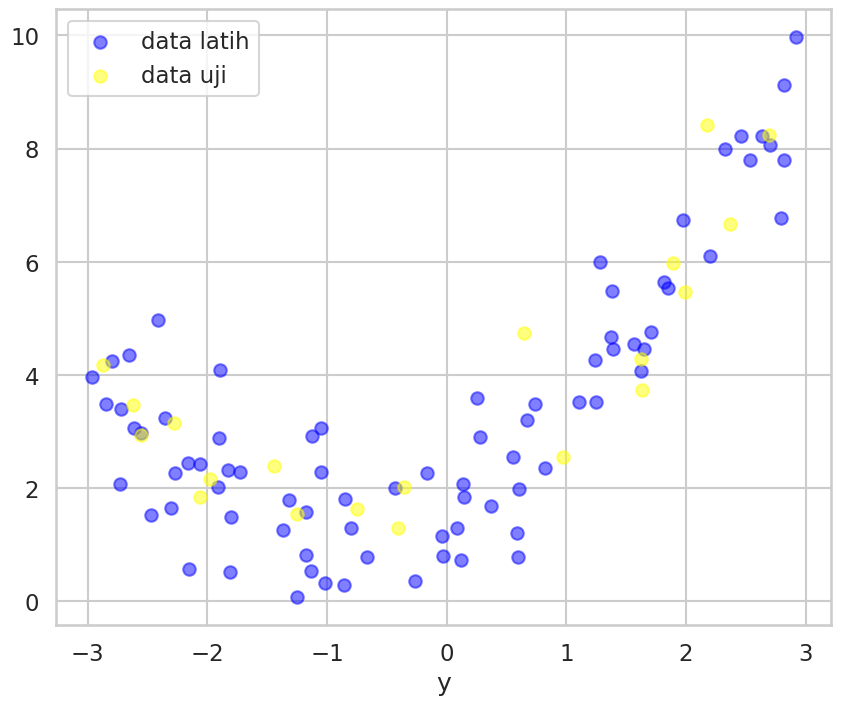

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Membuat data non-linear
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Lakukan Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

plt.figure(figsize=(10,8))
plt.scatter(X_train,Y_train, color='blue', alpha=0.5, label="data latih")
plt.scatter(X_test,Y_test, color='yellow', alpha=0.5, label="data uji")
plt.xlabel('x')
plt.xlabel('y')
plt.legend()
plt.show()

---
### 3. Hyperparameter Regularisasi Utama

Mari kita bahas tiga "rem" utama yang bisa kita gunakan untuk menghentikan pohon tumbuh terlalu liar.

#### **A. `max_depth`**
* **Apa itu?** Kedalaman maksimum dari pohon. Ini adalah cara paling langsung untuk mengontrol kompleksitas.
* **Bagaimana cara kerjanya?** Pohon akan berhenti tumbuh setelah mencapai kedalaman yang ditentukan, bahkan jika simpul-simpulnya masih bisa dipecah lebih lanjut.
* **Efek:** Nilai `max_depth` yang kecil (misalnya, 2 atau 3) akan menghasilkan model yang sangat sederhana (bias tinggi), sedangkan nilai yang sangat besar akan menyebabkan overfitting (varians tinggi).

#### **B. `min_samples_split`**
* **Apa itu?** Jumlah minimum sampel yang harus ada di sebuah simpul (node) agar simpul tersebut **boleh dipecah**. Defaultnya adalah 2.
* **Bagaimana cara kerjanya?** Jika sebuah simpul memiliki sampel kurang dari `min_samples_split`, ia tidak akan dipecah lagi dan akan menjadi *leaf node*.
* **Efek:** Menaikkan nilai ini (misalnya, menjadi 10 atau 20) akan membuat pohon lebih "sulit" untuk memecah data, sehingga menghasilkan model yang lebih sederhana dan lebih teregularisasi.

#### **C. `min_samples_leaf`**
* **Apa itu?** Jumlah minimum sampel yang **harus ada di setiap *leaf node*** setelah sebuah pemecahan terjadi. Defaultnya adalah 1.
* **Bagaimana cara kerjanya?** Pohon hanya akan melakukan pemecahan jika kedua *leaf* yang dihasilkan dari pemecahan tersebut masing-masing memiliki setidaknya `min_samples_leaf` sampel.
* **Efek:** Menaikkan nilai ini adalah cara yang sangat efektif untuk memastikan bahwa prediksi di setiap *leaf* dibuat berdasarkan jumlah data yang cukup, sehingga lebih stabil dan kurang rentan terhadap noise.

---
### 4. Demonstrasi Visual Efek Regularisasi

Mari kita latih beberapa model dengan pengaturan hyperparameter yang berbeda dan lihat bagaimana mereka memengaruhi bentuk prediksi.


In [23]:
# model overfitting
tree_overfit = DecisionTreeRegressor(random_state=42)
tree_overfit.fit(X_train, Y_train)

# model max_depth
tree_reg_depth = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_depth.fit(X_train, Y_train)

# model min_samples_leaf
tree_reg_leaf = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
tree_reg_leaf.fit(X_train, Y_train)

# model min_samples_split
tree_reg_split = DecisionTreeRegressor(min_samples_split=10, random_state=42)
tree_reg_split.fit(X_train, Y_train)

# buat data plot mulus
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
Y_pred_overfit = tree_overfit.predict(X_new)
Y_pred_depth = tree_reg_depth.predict(X_new)
Y_pred_leaf = tree_reg_leaf.predict(X_new)
Y_pred_split = tree_reg_split.predict(X_new)

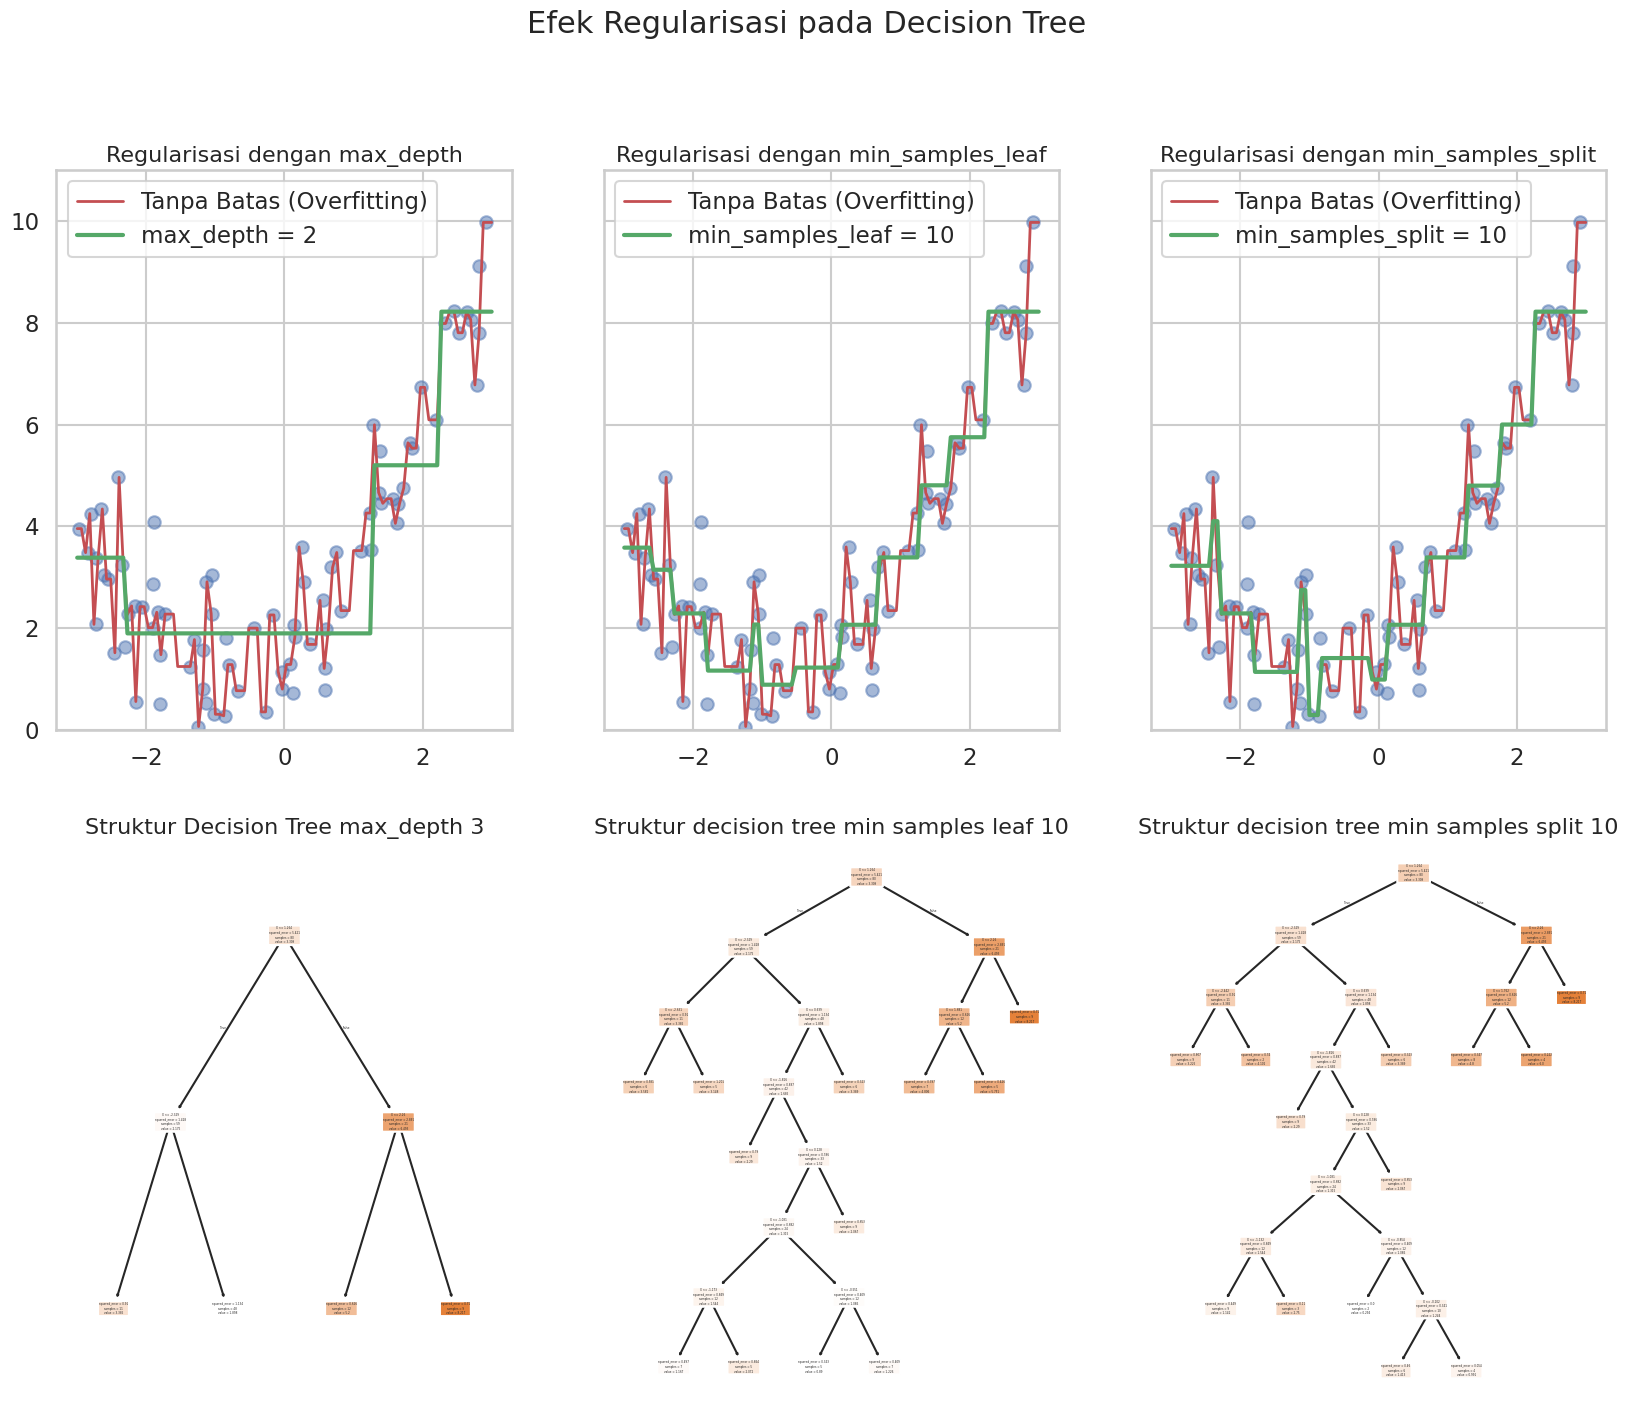

In [24]:
# Visualisasi
fig, axes = plt.subplots(2, 3, figsize=(20, 16), sharey=True)
fig.suptitle("Efek Regularisasi pada Decision Tree", fontsize=22)

# Plot 1: Efek max_depth
axes[0][0].scatter(X_train, Y_train, alpha=0.5)
axes[0][0].plot(X_new, Y_pred_overfit, "r-", linewidth=2, label="Tanpa Batas (Overfitting)")
axes[0][0].plot(X_new, Y_pred_depth, "g-", linewidth=3, label="max_depth = 2")
axes[0][0].set_title("Regularisasi dengan max_depth", fontsize=16)
axes[0][0].legend()
axes[0][0].set_ylim(0, 11)

# Plot 2: Efek min_samples_leaf
axes[0][1].scatter(X_train, Y_train, alpha=0.5)
axes[0][1].plot(X_new, Y_pred_overfit, "r-", linewidth=2, label="Tanpa Batas (Overfitting)")
axes[0][1].plot(X_new, Y_pred_leaf, "g-", linewidth=3, label="min_samples_leaf = 10")
axes[0][1].set_title("Regularisasi dengan min_samples_leaf", fontsize=16)
axes[0][1].legend()

# Plot 3: Efek min_samples_split
axes[0][2].scatter(X_train, Y_train, alpha=0.5)
axes[0][2].plot(X_new, Y_pred_overfit, "r-", linewidth=2, label="Tanpa Batas (Overfitting)")
axes[0][2].plot(X_new, Y_pred_split, "g-", linewidth=3, label="min_samples_split = 10")
axes[0][2].set_title("Regularisasi dengan min_samples_split", fontsize=16)
axes[0][2].legend()

# plot 3: plot tree depth
plot_tree(
    tree_reg_depth,
    ax=axes[1][0],
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=2
)
axes[1][0].set_title("Struktur Decision Tree max_depth 3", fontsize=16)

# plot 4: plot tree samples leaf
plot_tree(
    tree_reg_leaf,
    ax=axes[1][1],
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=2
)
axes[1][1].set_title("Struktur decision tree min samples leaf 10", fontsize=16)

# plot 5: plot tree samples leaf
plot_tree(
    tree_reg_split,
    ax=axes[1][2],
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=2
)
axes[1][2].set_title("Struktur decision tree min samples split 10", fontsize=16)

plt.show()

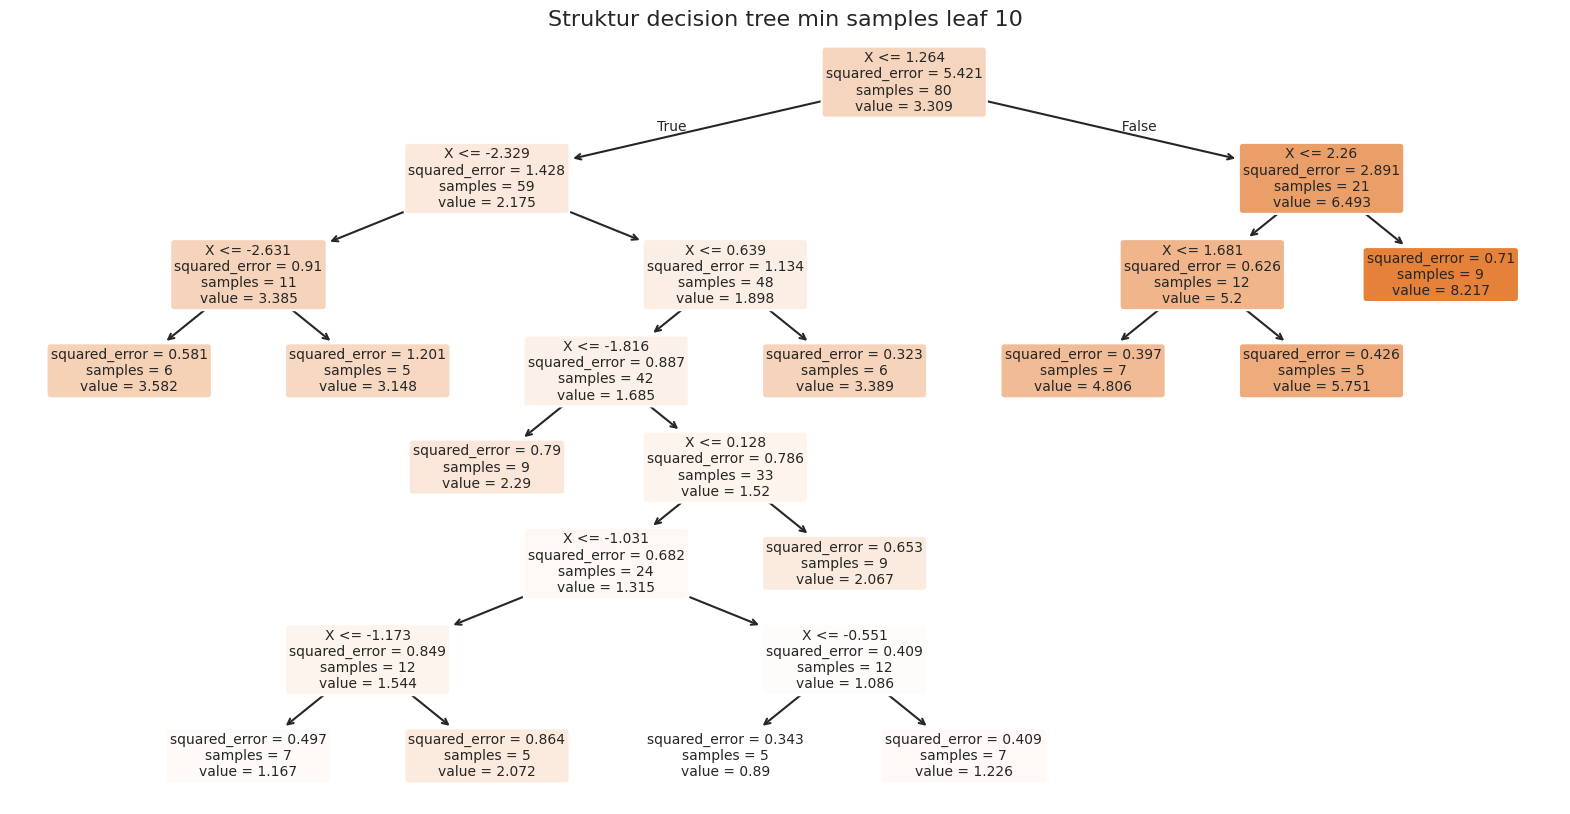

In [25]:
plt.figure(figsize=(20,10))
plot_tree(
    tree_reg_leaf,
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Struktur decision tree min samples leaf 10", fontsize=16)
plt.show()

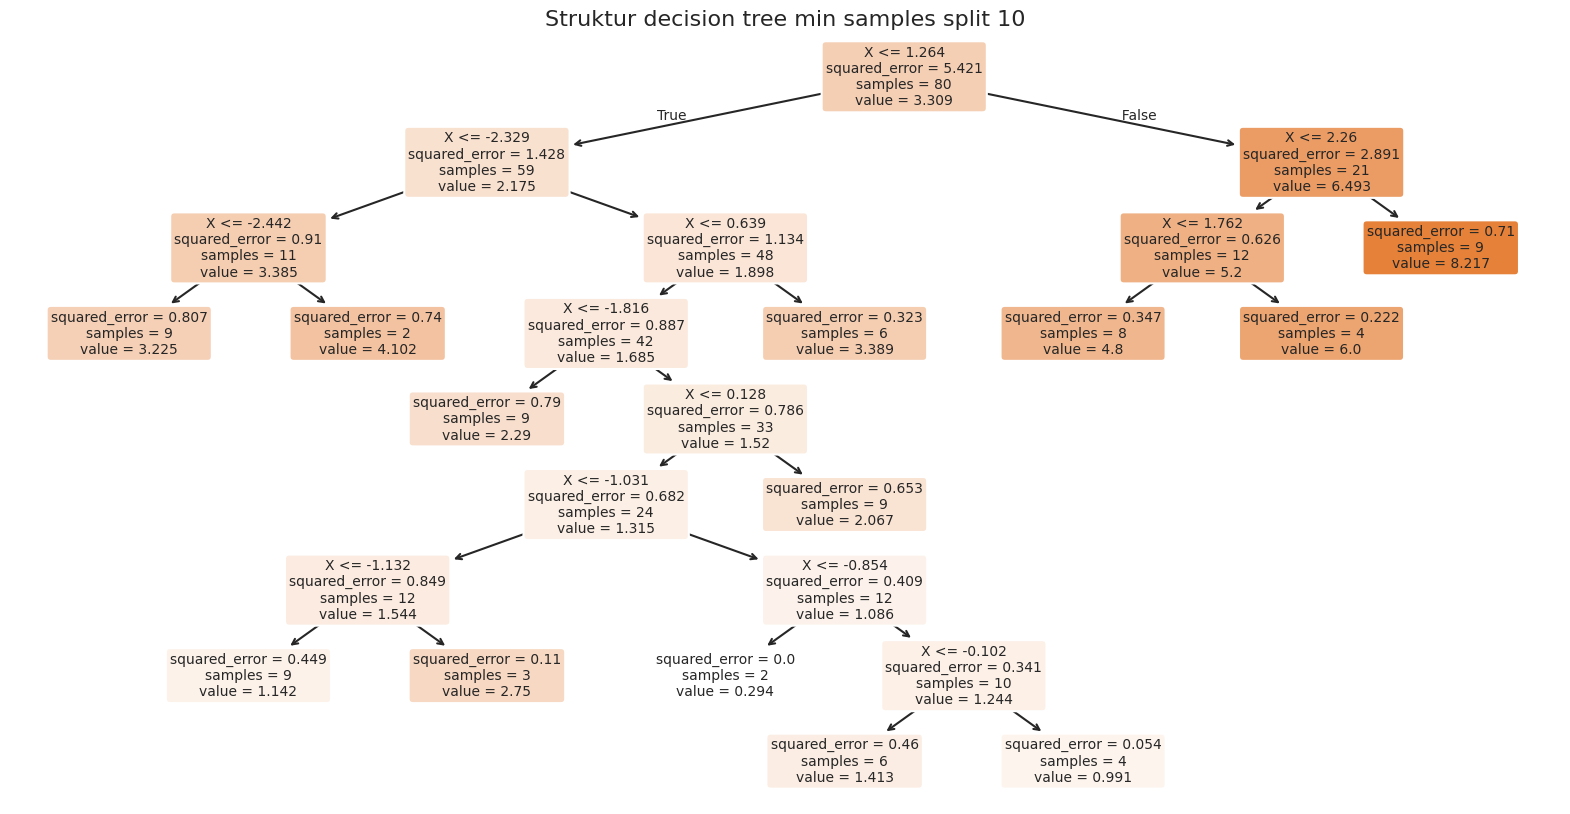

In [27]:
plt.figure(figsize=(20,10))
plot_tree(
    tree_reg_split,
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Struktur decision tree min samples split 10", fontsize=16)
plt.show()

**Analisis Visual:**

Perhatikan bagaimana kedua model yang diregularisasi (garis hijau) menghasilkan prediksi yang jauh lebih mulus dan lebih masuk akal dibandingkan model yang overfitting (garis merah). Mereka tidak lagi mencoba "mengejar" setiap titik noise.

* `max_depth=2` secara paksa menghentikan pohon setelah dua tingkat pertanyaan.
* `min_samples_leaf=10` mencegah pohon membuat segmen (leaf) yang hanya didasarkan pada segelintir titik data, sehingga prediksinya lebih stabil.


---
### 5. Bukti Kuantitatif

Mari kita lihat error pada data pengujian untuk membuktikan bahwa regularisasi benar-benar meningkatkan kemampuan generalisasi model.


In [28]:
# Error untuk model overfitting
rmse_overfit = np.sqrt(mean_squared_error(Y_test, tree_overfit.predict(X_test)))

# Error untuk model yang diregularisasi dengan max_depth
rmse_depth = np.sqrt(mean_squared_error(Y_test, tree_reg_depth.predict(X_test)))

# Error untuk model yang diregularisasi dengan min_samples_leaf
rmse_leaf = np.sqrt(mean_squared_error(Y_test, tree_reg_leaf.predict(X_test)))

# Error untuk model yang diregularisasi dengan min_samples_split
rmse_split = np.sqrt(mean_squared_error(Y_test, tree_reg_split.predict(X_test)))

print(f"RMSE Test - Model Overfitting: {rmse_overfit:.4f}")
print(f"RMSE Test - Model (max_depth=2): {rmse_depth:.4f}")
print(f"RMSE Test - Model (min_samples_leaf=10): {rmse_leaf:.4f}")
print(f"RMSE Test - Model (min_samples_split=10): {rmse_split:.4f}")

RMSE Test - Model Overfitting: 0.9583
RMSE Test - Model (max_depth=2): 1.1878
RMSE Test - Model (min_samples_leaf=10): 0.9447
RMSE Test - Model (min_samples_split=10): 0.9114


**Analisis Kuantitatif:**

Hasilnya jelas. Kedua model yang diregularisasi memiliki **error yang lebih rendah pada data pengujian** dibandingkan model yang overfitting. Dengan membuat model menjadi sedikit lebih buruk pada data pelatihan (meningkatkan bias), kita secara signifikan membuatnya lebih baik pada data baru (menurunkan varians). Ini adalah **Bias-Variance Tradeoff** dalam aksi!


### Kesimpulan

* Decision Tree yang tidak diregularisasi hampir pasti akan overfitting.
* Kita dapat (dan harus) mengontrol kompleksitasnya menggunakan hyperparameter seperti **`max_depth`**, **`min_samples_split`**, dan **`min_samples_leaf`**.
* Regularisasi adalah kunci untuk membangun model Decision Tree yang tidak hanya akurat pada data yang sudah ada, tetapi juga andal dalam memprediksi data di masa depan.

**Selanjutnya:**
Meskipun regularisasi membantu, satu Decision Tree masih bisa tidak stabil. Di chapter berikutnya, kita akan belajar tentang **Ensemble Methods**, sebuah teknik yang menggabungkan banyak pohon untuk membuat prediksi yang jauh lebih kuat dan akurat.
